<a href="https://colab.research.google.com/github/snmkrhn/G-rme_Engelliler_i-in_sokak-tabelalar-n-n-alg-lanmas-/blob/main/g%C3%B6rme_engelliler_i%C3%A7in_sokak_tabelalar%C4%B1n%C4%B1n_alg%C4%B1lanmas%C4%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()



Saving kaggle (4).json to kaggle (4) (2).json


In [ ]:
!mv "kaggle (4).json" kaggle.json



In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!pip install kaggle
!kaggle datasets download -d nageshsingh/the-street-view-text-dataset


Dataset URL: https://www.kaggle.com/datasets/nageshsingh/the-street-view-text-dataset
License(s): unknown
the-street-view-text-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip the-street-view-text-dataset.zip -d svt_dataset


Archive:  the-street-view-text-dataset.zip
replace svt_dataset/img/00_00.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
import os

for root, dirs, files in os.walk('svt_dataset'):
    level = root.replace('svt_dataset', '').count(os.sep)
    indent = ' ' * 4 * level
    print(f"{indent}{os.path.basename(root)}/")
    subindent = ' ' * 4 * (level + 1)
    for f in files:
        print(f"{subindent}{f}")


svt_dataset/
    train.xml
    test.xml
    img/
        16_17.jpg
        18_13.jpg
        00_13.jpg
        11_13.jpg
        02_03.jpg
        04_19.jpg
        17_17.jpg
        02_02.jpg
        03_07.jpg
        01_07.jpg
        10_05.jpg
        09_15.jpg
        19_13.jpg
        03_15.jpg
        09_16.jpg
        02_17.jpg
        05_11.jpg
        03_12.jpg
        06_02.jpg
        12_13.jpg
        00_18.jpg
        04_13.jpg
        13_07.jpg
        02_07.jpg
        18_11.jpg
        13_15.jpg
        06_15.jpg
        17_09.jpg
        04_00.jpg
        00_03.jpg
        15_02.jpg
        05_10.jpg
        13_04.jpg
        06_16.jpg
        19_06.jpg
        08_19.jpg
        04_05.jpg
        03_01.jpg
        18_01.jpg
        18_10.jpg
        02_13.jpg
        17_19.jpg
        13_05.jpg
        17_14.jpg
        07_10.jpg
        06_03.jpg
        10_04.jpg
        15_11.jpg
        15_13.jpg
        01_18.jpg
        06_05.jpg
        07_06.jpg
        16_08.j

In [ ]:
import os

data_dir = 'svt_dataset'  # çıkardığınız dizin adı buysa
img_extensions = ['.jpg', '.png', '.jpeg']

# Tüm görselleri listeleyelim
image_paths = []
for root, dirs, files in os.walk(data_dir):
    for file in files:
        if os.path.splitext(file)[1].lower() in img_extensions:
            image_paths.append(os.path.join(root, file))

print(f"Toplam {len(image_paths)} görsel bulundu.")
print("İlk 5 görsel yolu:")
print("\n".join(image_paths[:5]))


Toplam 350 görsel bulundu.
İlk 5 görsel yolu:
svt_dataset/img/16_17.jpg
svt_dataset/img/18_13.jpg
svt_dataset/img/00_13.jpg
svt_dataset/img/11_13.jpg
svt_dataset/img/02_03.jpg


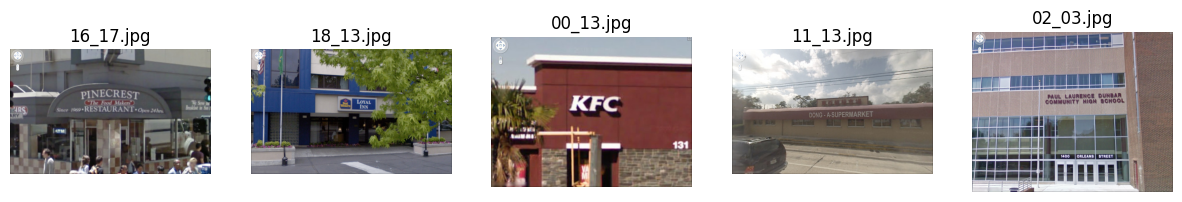

In [ ]:
import matplotlib.pyplot as plt
import cv2

# İlk 5 görseli görselleştirelim
plt.figure(figsize=(15, 5))
for i, img_path in enumerate(image_paths[:5]):
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.subplot(1, 5, i+1)
    plt.imshow(img)
    plt.title(os.path.basename(img_path))
    plt.axis("off")
plt.show()


In [ ]:
import os

data_dir = '/content/svt_dataset'  # dizin ismini senin yapına göre güncelle

for root, dirs, files in os.walk(data_dir):
    print(f"\nKlasör: {root}")
    for file in files[:5]:
        print(" →", file)



Klasör: /content/svt_dataset
 → train.xml
 → test.xml

Klasör: /content/svt_dataset/img
 → 16_17.jpg
 → 18_13.jpg
 → 00_13.jpg
 → 11_13.jpg
 → 02_03.jpg


In [ ]:
from PIL import Image
import pandas as pd

dims = []
for path in image_paths:
    with Image.open(path) as img:
        dims.append(img.size)

df_dims = pd.DataFrame(dims, columns=["Width", "Height"])
df_dims.describe()


,Width,Height
count,350.000000,350.000000
mean,1272.742857,866.357143
std,205.361299,101.532108
min,1024.000000,700.000000
25%,1278.000000,776.000000
50%,1280.000000,800.000000
75%,1280.000000,904.000000
max,1920.000000,1050.000000


In [ ]:
import os

for root, dirs, files in os.walk("/content"):
    print(root)


/content
/content/.config
/content/.config/logs
/content/.config/logs/2025.04.22
/content/.config/configurations
/content/svt_dataset
/content/svt_dataset/img
/content/sample_data


In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tqdm import tqdm

data_path = "/content/svt_dataset/img/"
image_files = [os.path.join(data_path, f) for f in os.listdir(data_path) if f.endswith('.jpg')]

print(f"Toplam görsel sayısı: {len(image_files)}")


Toplam görsel sayısı: 350


100%|██████████| 350/350 [00:03<00:00, 88.18it/s] 


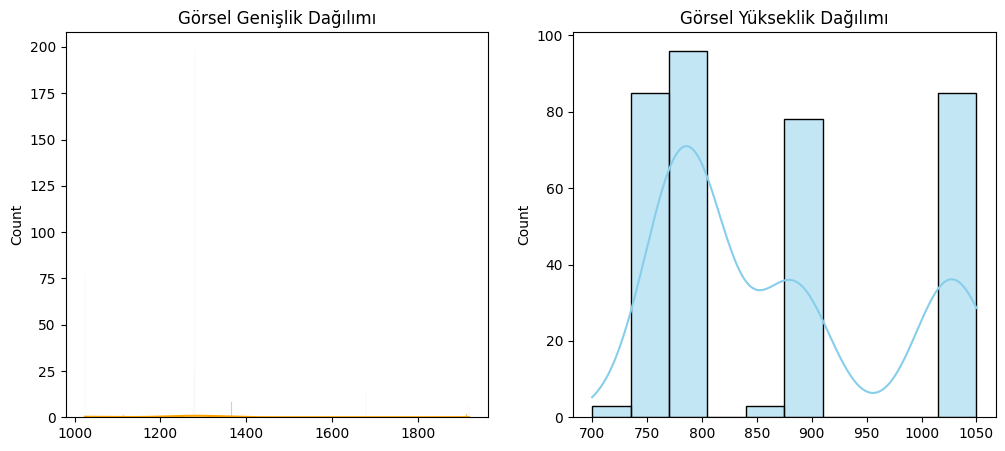

In [ ]:
widths, heights = [], []

for img_path in tqdm(image_files[:1000]):  # İlk 1000 görsel örnekleme için
    img = cv2.imread(img_path)
    if img is not None:
        h, w = img.shape[:2]
        widths.append(w)
        heights.append(h)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(widths, kde=True, color='orange')
plt.title('Görsel Genişlik Dağılımı')

plt.subplot(1, 2, 2)
sns.histplot(heights, kde=True, color='skyblue')
plt.title('Görsel Yükseklik Dağılımı')
plt.show()


In [ ]:
valid_images = []

for img_path in tqdm(image_files):
    try:
        img = cv2.imread(img_path)
        if img is not None and img.shape[0] > 0 and img.shape[1] > 0:
            valid_images.append(img_path)
    except:
        continue

print(f"Geçerli görsel sayısı: {len(valid_images)}")


100%|██████████| 350/350 [00:03<00:00, 105.59it/s]

Geçerli görsel sayısı: 350


100%|██████████| 100/100 [00:02<00:00, 36.84it/s]


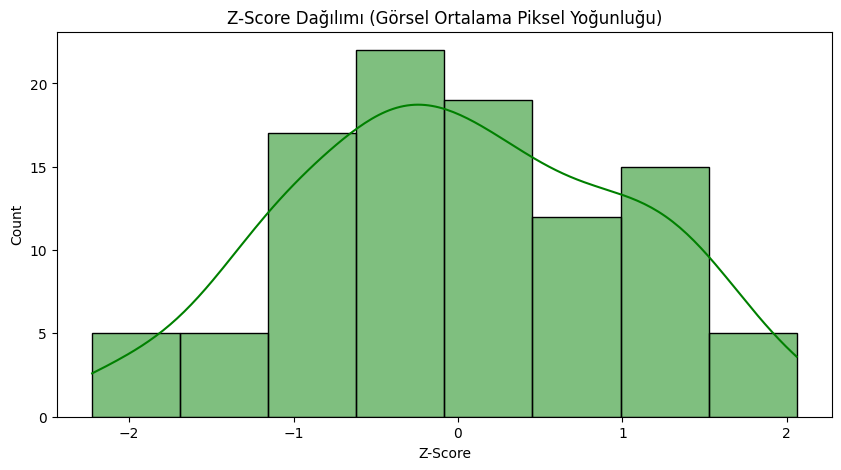

In [ ]:
from scipy.stats import zscore

# İlk 100 görsel üzerinden örnek
pixel_means = []

for img_path in tqdm(valid_images[:100]):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    pixel_means.append(np.mean(img))

z_scores = zscore(pixel_means)

plt.figure(figsize=(10, 5))
sns.histplot(z_scores, kde=True, color='green')
plt.title("Z-Score Dağılımı (Görsel Ortalama Piksel Yoğunluğu)")
plt.xlabel("Z-Score")
plt.show()


100%|██████████| 200/200 [00:04<00:00, 44.32it/s]


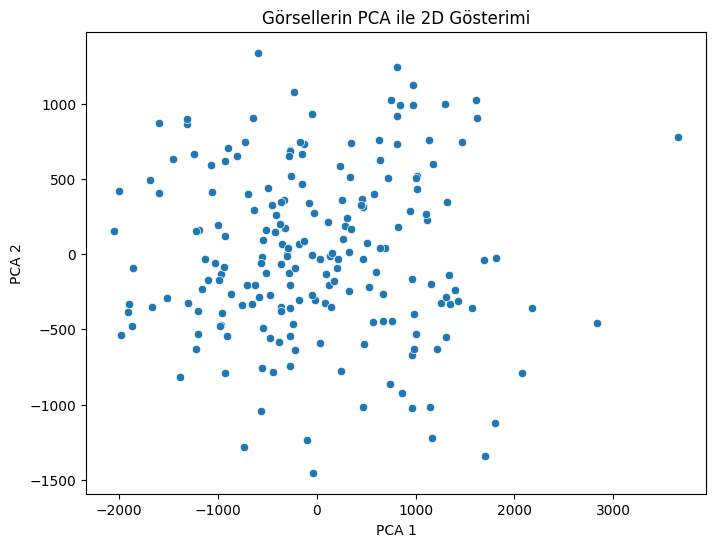

In [ ]:
from sklearn.decomposition import PCA

# Her görseli 32x32 gri tona indiriyoruz
resized_images = []

for img_path in tqdm(valid_images[:200]):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    img_resized = cv2.resize(img, (32, 32)).flatten()
    resized_images.append(img_resized)

X = np.array(resized_images)
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1])
plt.title("Görsellerin PCA ile 2D Gösterimi")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


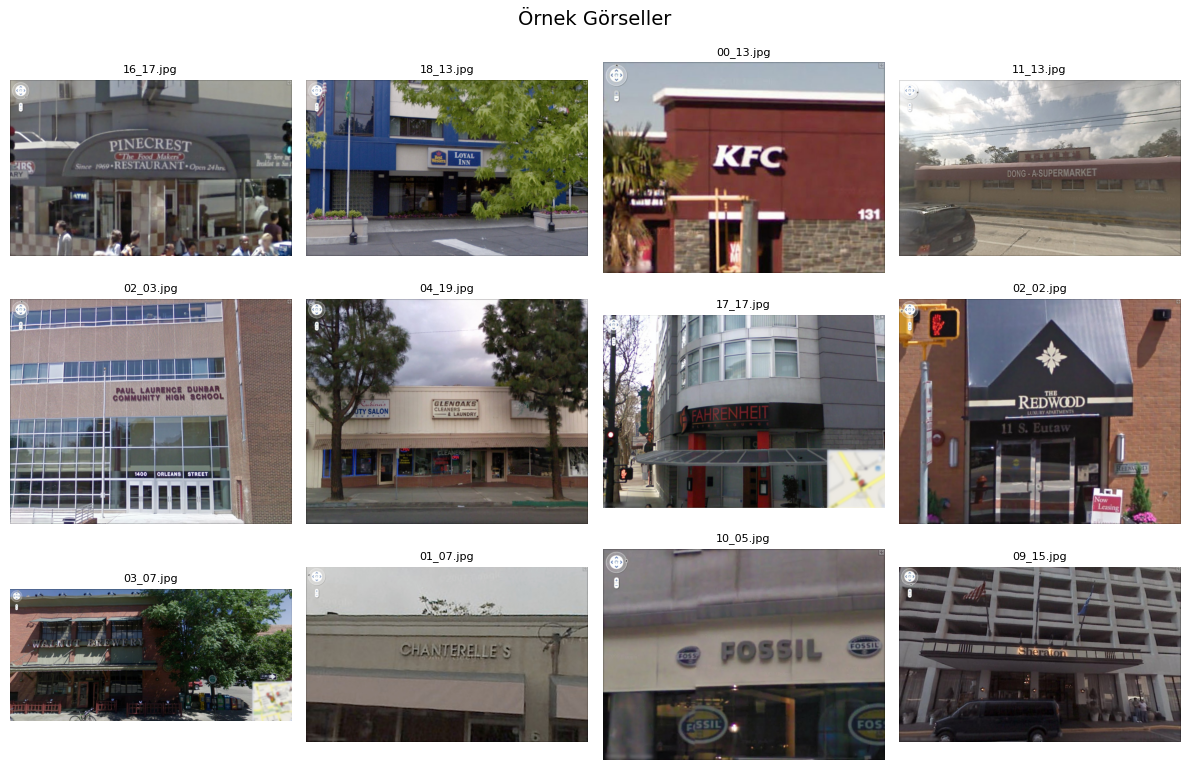

In [ ]:
import matplotlib.pyplot as plt

sample_images = valid_images[:12]  # ilk 12 örnek

plt.figure(figsize=(12, 8))
for i, img_path in enumerate(sample_images):
    img = cv2.imread(img_path)[..., ::-1]
    plt.subplot(3, 4, i+1)
    plt.imshow(img)
    plt.title(os.path.basename(img_path), fontsize=8)
    plt.axis('off')
plt.suptitle("Örnek Görseller", fontsize=14)
plt.tight_layout()
plt.show()


100%|██████████| 100/100 [00:01<00:00, 50.17it/s]


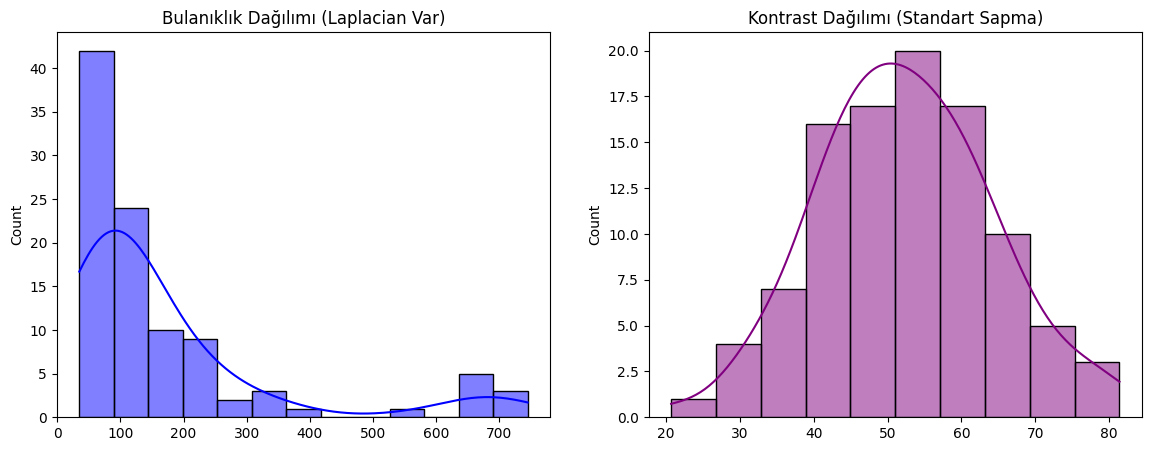

In [ ]:
def image_sharpness(img_gray):
    return cv2.Laplacian(img_gray, cv2.CV_64F).var()

def image_contrast(img_gray):
    return img_gray.std()

sharpness_scores, contrast_scores = [], []

for img_path in tqdm(valid_images[:100]):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    sharpness_scores.append(image_sharpness(img))
    contrast_scores.append(image_contrast(img))

plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.histplot(sharpness_scores, color='blue', kde=True)
plt.title("Bulanıklık Dağılımı (Laplacian Var)")

plt.subplot(1, 2, 2)
sns.histplot(contrast_scores, color='purple', kde=True)
plt.title("Kontrast Dağılımı (Standart Sapma)")

plt.show()


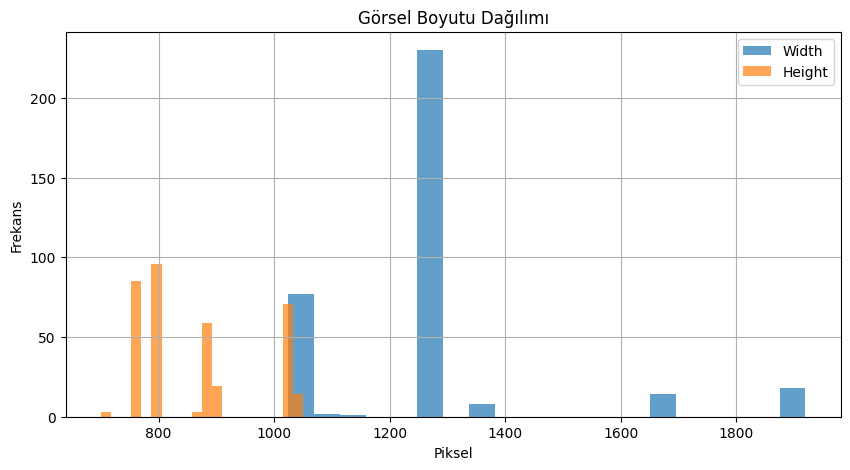

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.hist(df_dims["Width"], bins=20, alpha=0.7, label="Width")
plt.hist(df_dims["Height"], bins=20, alpha=0.7, label="Height")
plt.legend()
plt.title("Görsel Boyutu Dağılımı")
plt.xlabel("Piksel")
plt.ylabel("Frekans")
plt.grid(True)
plt.show()


In [ ]:
import cv2
import os
from tqdm import tqdm


In [ ]:
# Hedef boyut (Width x Height) - Grafikte en sık görülen değerler
target_size = (1200, 800)  # (genişlik, yükseklik)

# Kayıt edilecek yeni klasör yolu
resized_dir = "/content/resized_images"
os.makedirs(resized_dir, exist_ok=True)

# valid_images listen varsa onun üzerinden dön
for img_path in tqdm(valid_images):
    try:
        # Görseli gri tonlamalı olarak oku
        img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

        # Boyutlandır
        resized_img = cv2.resize(img, target_size)

        # Yeni yola kayıt et
        filename = os.path.basename(img_path)
        save_path = os.path.join(resized_dir, filename)
        cv2.imwrite(save_path, resized_img)

    except Exception as e:
        print(f"Hata oluştu: {img_path} | {e}")


100%|██████████| 350/350 [00:05<00:00, 69.80it/s]


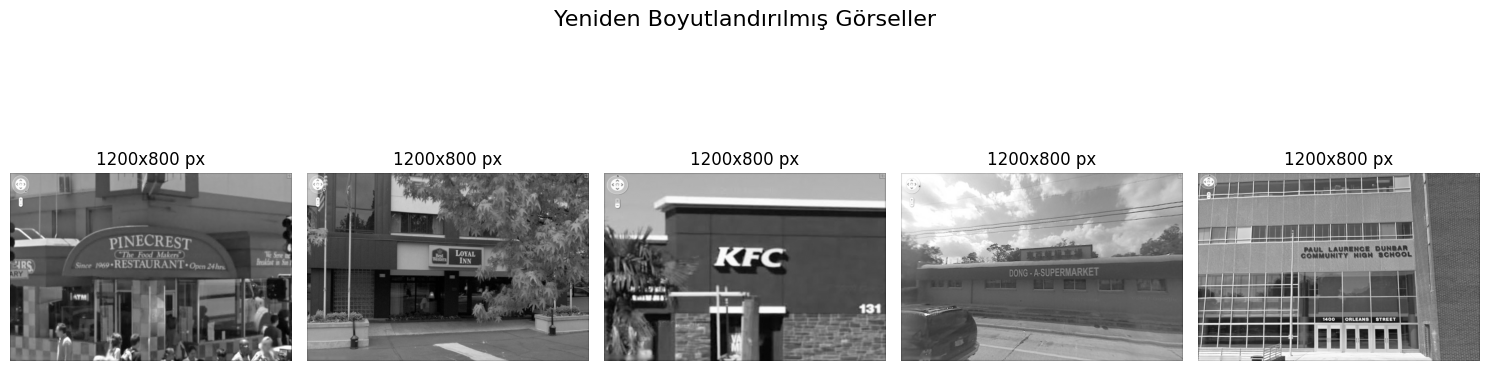

In [ ]:
import matplotlib.pyplot as plt
import cv2
import os

# Görselleştirmek istediğin görsel sayısı
num_samples = 5

# Yeniden boyutlandırılmış klasör yolu
resized_dir = "/content/resized_images"
resized_files = os.listdir(resized_dir)[:num_samples]

plt.figure(figsize=(15, 5))

for i, file in enumerate(resized_files):
    img_path = os.path.join(resized_dir, file)
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)

    plt.subplot(1, num_samples, i+1)
    plt.imshow(img, cmap='gray')
    plt.title(f"{img.shape[1]}x{img.shape[0]} px")  # width x height
    plt.axis('off')

plt.suptitle("Yeniden Boyutlandırılmış Görseller", fontsize=16)
plt.tight_layout()
plt.show()


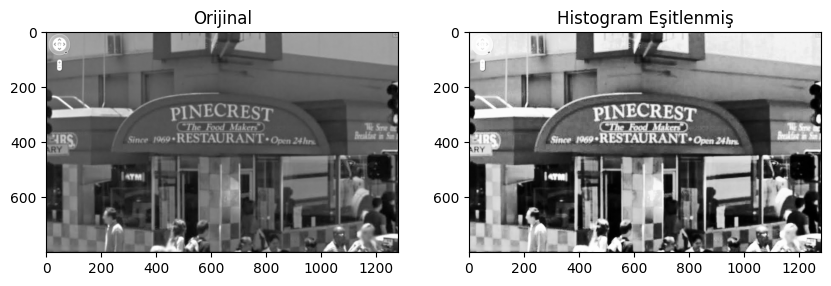

In [ ]:
img = cv2.imread(valid_images[0], cv2.IMREAD_GRAYSCALE)
equalized = cv2.equalizeHist(img)

plt.figure(figsize=(10,4))
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title("Orijinal")

plt.subplot(1, 2, 2)
plt.imshow(equalized, cmap='gray')
plt.title("Histogram Eşitlenmiş")
plt.show()


In [ ]:
features = []

for img_path in tqdm(valid_images[:500]):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        continue
    mean_val = np.mean(img)
    std_val = np.std(img)
    sharpness = cv2.Laplacian(img, cv2.CV_64F).var()
    h, w = img.shape
    features.append([mean_val, std_val, sharpness, h, w])

df_features = pd.DataFrame(features, columns=["Brightness", "Contrast", "Sharpness", "Height", "Width"])
df_features.head()


100%|██████████| 350/350 [00:08<00:00, 40.55it/s]


,Brightness,Contrast,Sharpness,Height,Width
0,95.261572,41.131024,48.101284,800,1280
1,90.016405,43.909405,106.428715,800,1280
2,108.086217,59.047972,65.162645,768,1024
3,142.632293,57.393514,76.078920,800,1280
4,130.579269,48.649037,554.096611,1024,1280


In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
normalized_features = scaler.fit_transform(df_features)
df_norm = pd.DataFrame(normalized_features, columns=df_features.columns)

df_norm.describe().T  # Normalize edilmiş öznitelik istatistikleri


,count,mean,std,min,25%,50%,75%,max
Brightness,350.0,0.365677,0.160250,0.0,0.257301,0.362332,0.479994,1.0
Contrast,350.0,0.484883,0.182424,0.0,0.351265,0.490573,0.605626,1.0
Sharpness,350.0,0.152869,0.199698,0.0,0.033227,0.062385,0.151779,1.0
Height,350.0,0.475306,0.290092,0.0,0.217143,0.285714,0.582857,1.0
Width,350.0,0.277615,0.229198,0.0,0.283482,0.285714,0.285714,1.0


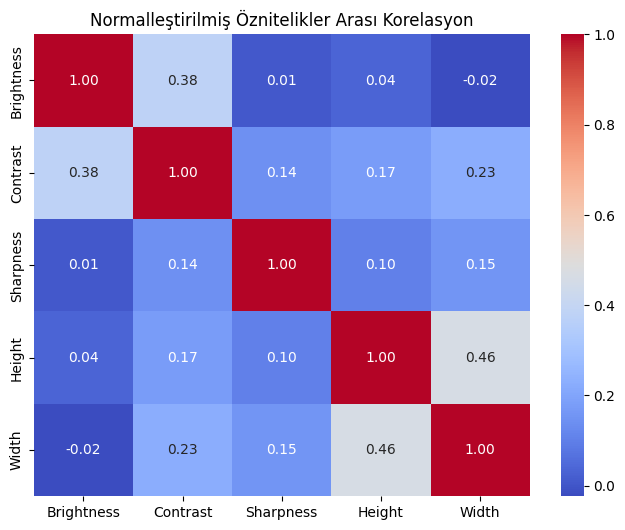

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df_norm.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Normalleştirilmiş Öznitelikler Arası Korelasyon")
plt.show()


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Örneğin df adında bir DataFrame'in olduğunu varsayalım
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df)

df_scaled = pd.DataFrame(scaled_features, columns=df.columns)

# Korelasyon matrisini tekrar hesapla
correlation_matrix = df_scaled.corr()


ValueError: Found array with 0 sample(s) (shape=(0, 2)) while a minimum of 1 is required by StandardScaler.

In [ ]:
df_norm["Aspect_Ratio"] = df_features["Height"] / (df_features["Width"] + 1)
df_norm["Bright_Contrast"] = df_features["Brightness"] * df_features["Contrast"]
df_norm["Sharp_Bright"] = df_features["Sharpness"] * df_features["Brightness"]


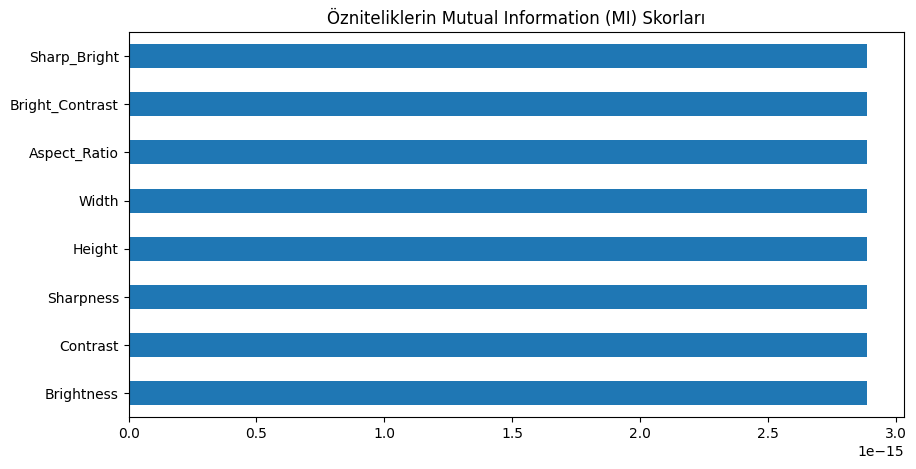

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# Yalancı etiket oluşturalım (örnek için)
dummy_labels = [1 if h > 50 else 0 for h in df_features["Height"]]
mi_scores = mutual_info_classif(df_norm, dummy_labels, discrete_features=False)

mi_df = pd.Series(mi_scores, index=df_norm.columns)
mi_df.sort_values(ascending=False).plot(kind='barh', figsize=(10, 5))
plt.title("Özniteliklerin Mutual Information (MI) Skorları")
plt.show()


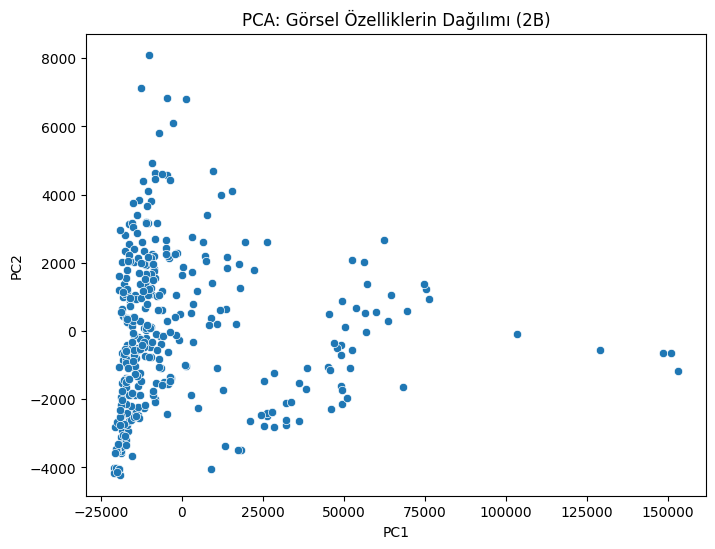

In [ ]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_norm)
pca_df = pd.DataFrame(pca_result, columns=["PC1", "PC2"])

plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1", y="PC2", data=pca_df)
plt.title("PCA: Görsel Özelliklerin Dağılımı (2B)")
plt.show()
